   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182

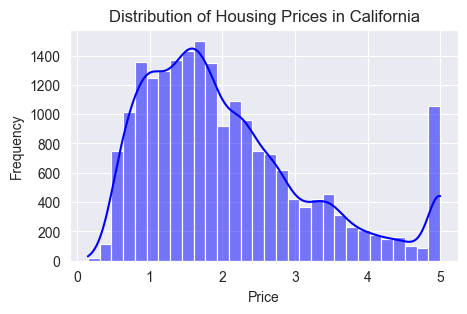

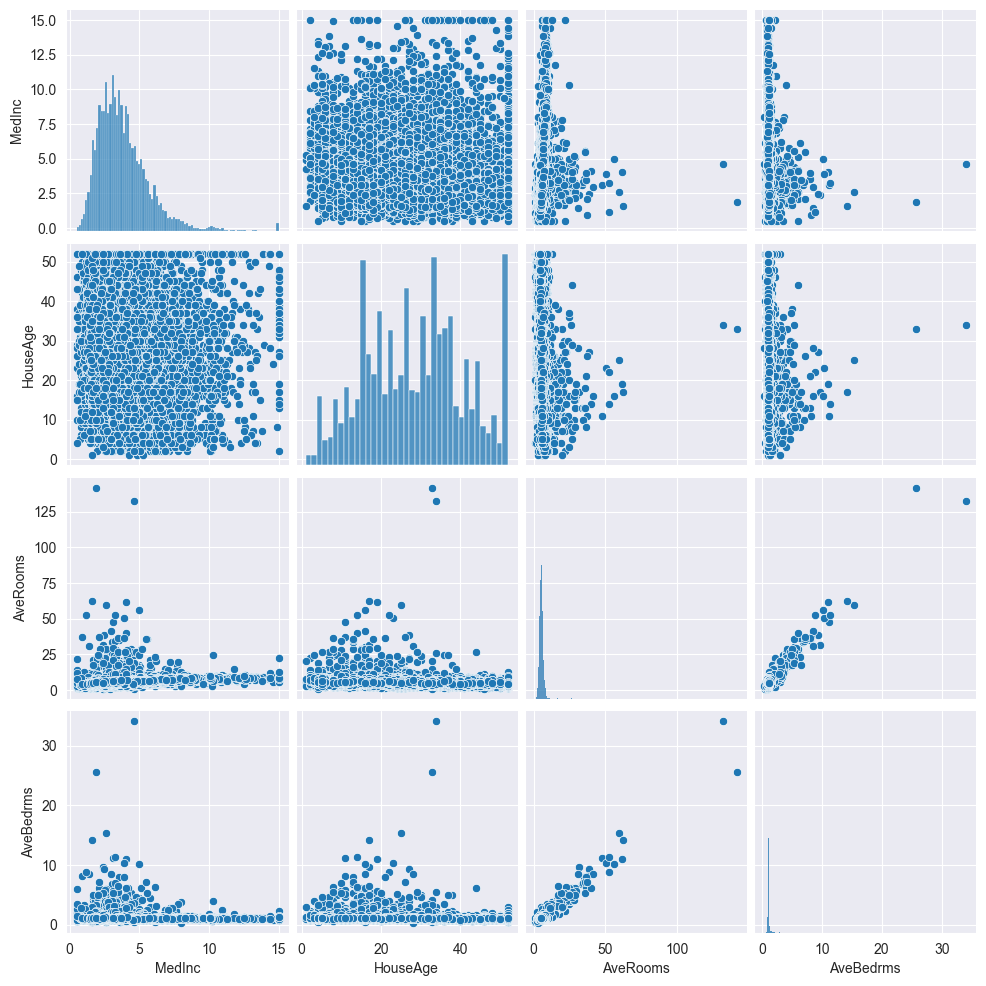

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# 캘리포니아 주택 데이터셋 로드
housing = fetch_california_housing()

# 데이터프레임 생성
california_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
california_housing['PRICE'] = housing.target

# 데이터 확인
print(california_housing.head())

# 특성 스케일링 (평균 0, 표준편차 1로 스케일 조정)
scaler = StandardScaler()
california_housing_scaled = scaler.fit_transform(california_housing)

# 스케일링된 데이터를 데이터프레임으로 변환
california_housing_scaled = pd.DataFrame(california_housing_scaled, columns=california_housing.columns)

# 데이터 확인
print(california_housing_scaled.head())

# 집값 분포 확인 (타겟 변수)
plt.figure(figsize=(5, 3))
sns.histplot(california_housing['PRICE'], bins=30, kde=True, color='blue')
plt.title('Distribution of Housing Prices in California')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 산점도 행렬
sns.pairplot(california_housing, vars=california_housing.columns[:4])
plt.show()


In [5]:
# 결측치 확인
missing_values = california_housing.isnull().sum()
print("Missing Values:")
print(missing_values)

# 이상치 확인 (간단한 방법으로 IQR을 사용하여 이상치를 탐지하는 것도 가능합니다)
Q1 = california_housing.quantile(0.25)
Q3 = california_housing.quantile(0.75)
IQR = Q3 - Q1
outliers = ((california_housing < (Q1 - 1.5 * IQR)) | (california_housing > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers:")
print(outliers)

# 결측치 처리
california_housing.dropna(inplace=True)

# 이상치 처리 (예시로 이상치를 IQR 기준으로 제거하는 방법을 사용)
california_housing = california_housing[~((california_housing < (Q1 - 1.5 * IQR)) | (california_housing > (Q3 + 1.5 * IQR))).any(axis=1)]

# 처리 후 데이터 크기 확인
print("\nData size after processing:")
print(california_housing.shape)


Missing Values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

Outliers:
MedInc         681
HouseAge         0
AveRooms       511
AveBedrms     1424
Population    1196
AveOccup       711
Latitude         0
Longitude        0
PRICE         1071
dtype: int64

Data size after processing:
(16312, 9)


In [6]:
from sklearn.preprocessing import StandardScaler

# Z 점수 정규화를 위한 객체 생성
scaler = StandardScaler()

# 정규화할 데이터 (예: california_housing_scaled)
# 데이터프레임에서 타겟 변수를 제외하고 정규화합니다.
data_to_normalize = california_housing.drop(columns=['PRICE'])

# 데이터 정규화
normalized_data = scaler.fit_transform(data_to_normalize)

# 정규화된 데이터를 데이터프레임으로 변환
normalized_df = pd.DataFrame(normalized_data, columns=data_to_normalize.columns)

# 정규화된 데이터 확인
print(normalized_df.head())


     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.491677   1.84949  3.001399   0.393891   -1.236573 -0.100659  1.017985   
1  1.374203   1.84949  0.633741   0.388078   -1.137747 -0.507620  1.017985   
2  0.130327   1.84949  1.078856   0.508584   -1.126589 -1.094067  1.017985   
3  0.262267   1.84949 -0.377889   0.847278   -1.368872 -1.160590  1.017985   
4  0.000810   1.84949 -0.214746  -1.440116   -0.283381 -1.178979  1.013313   

   Longitude  
0  -1.309756  
1  -1.314768  
2  -1.314768  
3  -1.314768  
4  -1.314768  


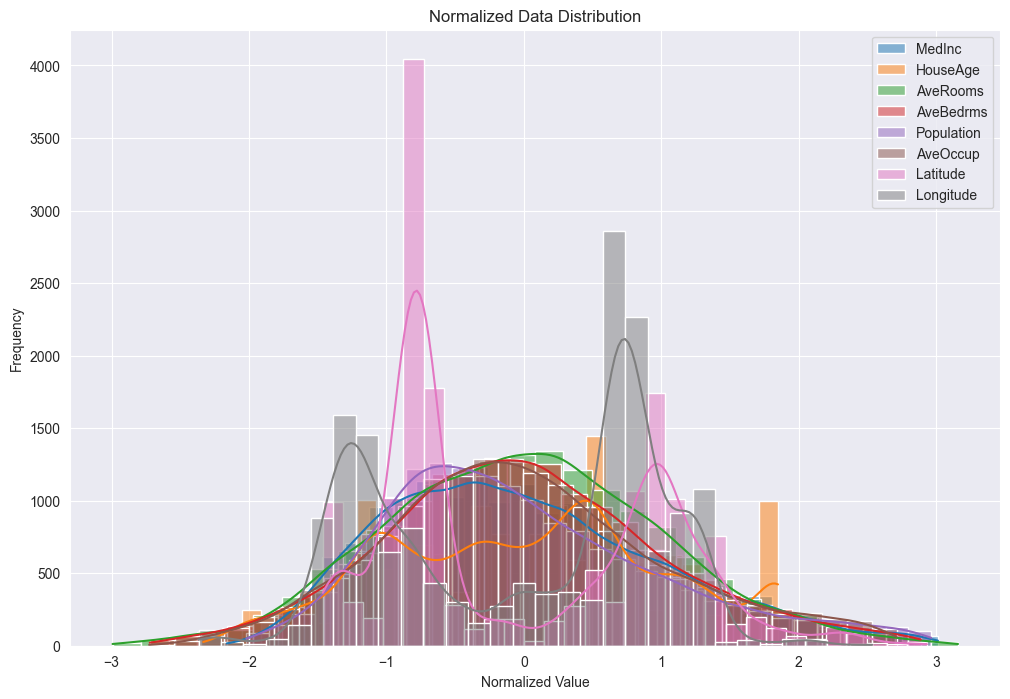

In [7]:
# 전체 데이터의 히스토그램 그리기
plt.figure(figsize=(12, 8))
for column in normalized_df.columns:
    sns.histplot(normalized_df[column], bins=30, kde=True, label=column)
plt.title('Normalized Data Distribution')
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


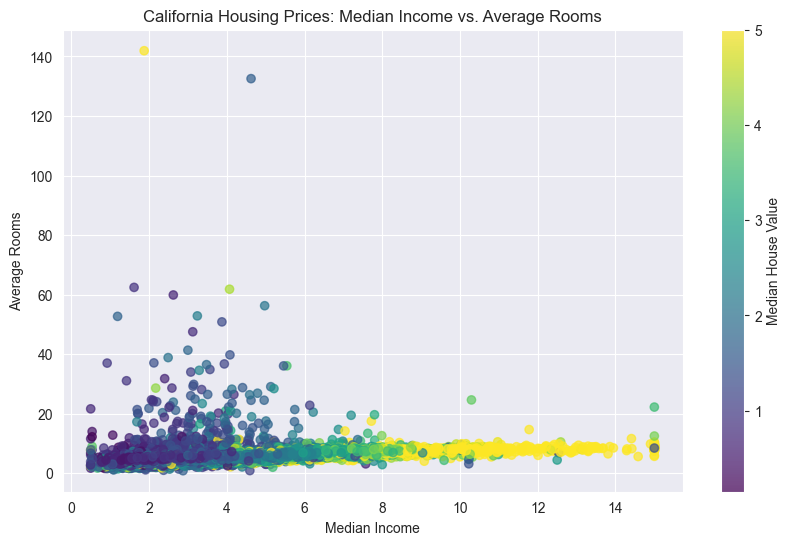

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# 캘리포니아 집값 데이터셋 로드
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
target = pd.DataFrame(california_housing.target, columns=["MedHouseValue"])

# 주택 가격과 특성 선택
selected_features = ['MedInc', 'AveRooms']
X = data[selected_features]
y = target['MedHouseValue']

# 2D 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(X['MedInc'], X['AveRooms'], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Median House Value')  # 컬러바 추가
plt.xlabel('Median Income')
plt.ylabel('Average Rooms')
plt.title('California Housing Prices: Median Income vs. Average Rooms')
plt.grid(True)
plt.show()
